## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [5]:
col_data = data.columns

In [6]:
print(X.shape)
print(Y.shape)

(100, 7)
(100,)


## perturbation test to check the presence of collinearity

## Task: 1 Logistic Regression

### 1. Finding the Correlation between the features

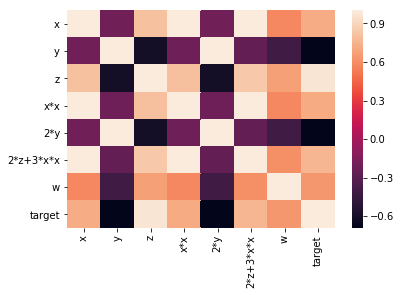

In [7]:
corr = data.corr()
sns.heatmap(corr)

Observation : In hitmap, pale white color shows the strong relationships between the features ,  brown color and dark brown
    color shows the less or low relationship betweeen the features and black color shows there not much relationship 

### 2. Finding the best model for the given data

In [8]:
# 1. Train Logistic regression on data(X,Y)
from sklearn.linear_model import LogisticRegression
log_r = SGDClassifier(loss='log', max_iter=100)
log_r.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = log_r.predict(X)

In [10]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y, y_pred)
confusion_matrix

array([[50,  0],
       [ 0, 50]], dtype=int64)

Observation :
    Here ,I got  True Positive value = 50 and True Negaive value = 50 . Also, both , false Positive and Negative values are 0. 

In [11]:
print("Accuracy for Logistic Regression :",metrics.accuracy_score(Y, y_pred))
print("Precision for Logistic Regression :",metrics.precision_score(Y, y_pred))
print("Recall for Logistic Regression :",metrics.recall_score(Y, y_pred))

Accuracy for Logistic Regression : 1.0
Precision for Logistic Regression : 1.0
Recall for Logistic Regression : 1.0


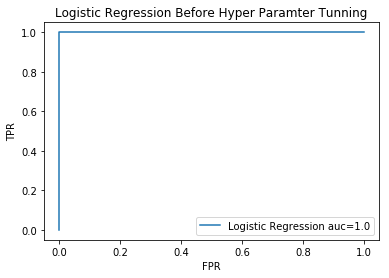

In [12]:
y_predicted_prob = log_r.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y,  y_predicted_prob)
auc = metrics.roc_auc_score(Y, y_predicted_prob)
plt.plot(fpr,tpr,label="Logistic Regression auc="+str(auc))
plt.title("Logistic Regression Before Hyper Paramter Tunning")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

In [13]:
# b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation

In [14]:
from sklearn.linear_model import Ridge
alpha_value = np.logspace(0.001, 100, 30)
model = Ridge()                               # create and fit a ridge regression model,to test each alpha value
classifier = GridSearchCV(estimator=model, param_grid=dict(alpha=alpha_value))
classifier.fit(X, Y)
print(classifier )
print("The best hyper paramter alpha is :",classifier.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00231e+000, 2.81346e+003, 7.89737e+006, 2.21679e+010,
       6.22251e+013, 1.74665e+017, 4.90285e+020, 1.37623e+024,
       3.86306e+027, 1.08436e+031, 3.04378e+034, 8.54388e+037,
       2.39826e+041, 6.73190e+044, 1.88964e+048, 5.30421e+051,
       1.48889e+055, 4.17930e+058, 1.17313e+062, 3.29296e+065,
       9.24331e+068, 2.59459e+072, 7.28300e+075, 2.04433e+079,
       5.73843e+082, 1.61077e+086, 4.52143e+089, 1.26916e+093,
       3.56253e+096, 1.00000e+100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
The best hyper paramter alpha is : 1.0023052380778996


In [15]:
# 3. Best Model = a new Logistic regression with the best alpha = 1.0023052380778996

In [16]:
best_model = SGDClassifier(loss='log', max_iter=100, alpha = 1.0023052380778996 )
best_model.fit(X, Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
y_pred_new = best_model.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, y_pred_new)
confusion_matrix

array([[50,  0],
       [ 0, 50]], dtype=int64)

Observation :
    Here also, after hyper parameter tunning , i got the same cofusion matrix result as above i. e.
    True Positive value = 50 and True Negaive value = 50 . Also, both , false Positive and Negative values are 0.

In [18]:
print("Accuracy for Logistic Regression :",metrics.accuracy_score(Y, y_pred_new))
print("Precision for Logistic Regression :",metrics.precision_score(Y, y_pred_new))
print("Recall for Logistic Regression :",metrics.recall_score(Y, y_pred_new))

Accuracy for Logistic Regression : 1.0
Precision for Logistic Regression : 1.0
Recall for Logistic Regression : 1.0


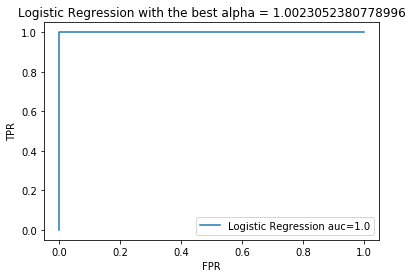

In [19]:
y_predicted_prob_new = best_model.predict_proba(X)[::,1]
fpr_new, tpr_new, _ = metrics.roc_curve(Y,  y_predicted_prob_new)
auc = metrics.roc_auc_score(Y, y_predicted_prob_new)
plt.plot(fpr_new,tpr_new,label="Logistic Regression auc="+str(auc))
plt.title("Logistic Regression with the best alpha = 1.0023052380778996")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

Observation : I observed that , Before n After the hyper paramter tunning , the roc auc curve for Logistic Regression is same .

### 3.Getting the weights with the original data

In [20]:
w = best_model.coef_
print("weights for original data :", w)
best_model_accuracy  = metrics.accuracy_score(Y, y_pred_new)
print("The best model accuracy is :",best_model_accuracy  )

weights for original data : [[ 0.1688959  -0.18692951  0.25890283  0.16478854 -0.18692951  0.17956911
   0.15013022]]
The best model accuracy is : 1.0


### 4. Modifying original data

In [21]:
# Adding a noise(10^-2) to each element of X
X_dash = X  
for r in (X_dash) :
    for c in range(len(r)):
        r[c] = r[c] + (10^-2)

#print(X_dash)
print(X_dash.shape)

(100, 7)


In [22]:
best_model.fit(X_dash, Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
y_pred_dash= best_model.predict(X_dash)
w_dash = best_model.coef_
print("weights for noisy data :", w_dash)
best_model_accuracy_edited= metrics.accuracy_score(Y, y_pred_dash)
print("The best model accuracy for noisy data is :",best_model_accuracy_edited )

weights for noisy data : [[ 0.10791733 -0.28268665  0.18258854  0.10351437 -0.28268665  0.11747248
   0.07182638]]
The best model accuracy for noisy data is : 0.99


### 5.  Checking deviations in metric and weights 

In [24]:
# deviations in metric
deviation_accuracy = best_model_accuracy_edited - best_model_accuracy 
print("Deviation in Accuracy :", deviation_accuracy )

Deviation in Accuracy : -0.010000000000000009


In [25]:
absolute_change = abs(w-w_dash)
print("Absolute change in weight is :",absolute_change)

Absolute change in weight is : [[0.06097857 0.09575714 0.07631428 0.06127417 0.09575714 0.06209663
  0.07830385]]


In [26]:
a = col_data.tolist()
b = absolute_change.tolist()
dict_1  = dict(zip(a,b[0]))
sorted_list = sorted(dict_1.values(), reverse = True)
print("The top 4 features which have higher % change in weights for Logistic Regression")
for r in range (1,4):
    for key, val in dict_1.items():
        if sorted_list[r] == dict_1[key]:
            print(key)

The top 4 features which have higher % change in weights for Logistic Regression
y
2*y
w
z


# Task: 2 Linear SVM

 ### 2. Finding the best model for the given data

In [27]:
# training Linear svm  before hyper paramter tunning 
linear_svm = SGDClassifier(loss='hinge', max_iter=100)
linear_svm.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
y_pred_svm = linear_svm.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, y_pred_svm)
confusion_matrix

array([[50,  0],
       [ 0, 50]], dtype=int64)

Observation :
    Here ,I got  True Positive value = 50 and True Negaive value = 50 as like Logistic regression . 
    Also, both , false Positive and Negaive values are 0.

In [29]:
print("Accuracy for Logistic Regression :",metrics.accuracy_score(Y, y_pred_svm))
print("Precision for Logistic Regression :",metrics.precision_score(Y, y_pred_svm))
print("Recall for Logistic Regression :",metrics.recall_score(Y, y_pred_svm))

Accuracy for Logistic Regression : 1.0
Precision for Logistic Regression : 1.0
Recall for Logistic Regression : 1.0


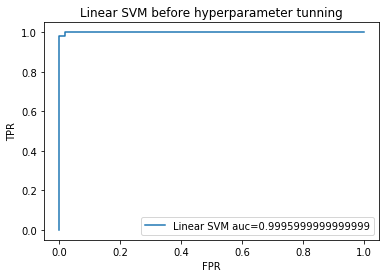

In [31]:
from sklearn.calibration import CalibratedClassifierCV
model_1 = CalibratedClassifierCV(linear_svm)
model_1.fit(X, Y)
y_predicted_prob_svm = model_1.predict_proba(X)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(Y,  y_predicted_prob_svm)
auc = metrics.roc_auc_score(Y, y_predicted_prob_svm)
plt.plot(fpr_svm,tpr_svm,label="Linear SVM auc="+str(auc))
plt.title("Linear SVM before hyperparameter tunning")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

### 3.  Best Model = a new Logistic regression with the best alpha = 1.0023052380778996

In [32]:
# training linear svm with best alpha 
best_model_svm = SGDClassifier(loss='hinge', max_iter=100, alpha = 1.0023052380778996 )
best_model_svm.fit(X, Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
y_pred_new_svm = best_model_svm.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, y_pred_new_svm)
confusion_matrix

array([[49,  1],
       [ 0, 50]], dtype=int64)

Observation : Unlike all the above three results ,I got different values here, True Positive value = 49 and True Negaive value = 50 ,False Positive = 1 and Flase Negaive
    value is 0.

In [34]:
print("Accuracy for Logistic Regression :",metrics.accuracy_score(Y, y_pred_new_svm))
print("Precision for Logistic Regression :",metrics.precision_score(Y, y_pred_new_svm))
print("Recall for Logistic Regression :",metrics.recall_score(Y, y_pred_new_svm))

Accuracy for Logistic Regression : 0.99
Precision for Logistic Regression : 0.9803921568627451
Recall for Logistic Regression : 1.0


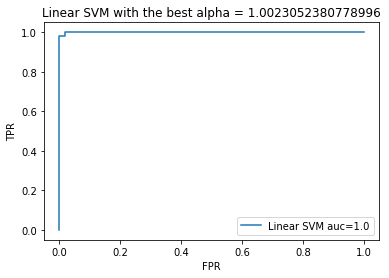

In [35]:
y_predicted_prob_new_svm = model_1.predict_proba(X)[::,1]
fpr_svm_new, tpr_svm_new, _ = metrics.roc_curve(Y,  y_predicted_prob_new_svm)
auc = metrics.roc_auc_score(Y, y_predicted_prob_new)
plt.plot(fpr_svm_new,tpr_svm_new,label="Linear SVM auc="+str(auc))
plt.title("Linear SVM with the best alpha = 1.0023052380778996")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()

Observation : I observed that , Before n After the hyper paramter tunning , the roc auc curve for Linear SVM is same .

### 4 .Getting the weights with the original data

In [36]:
y_pred_original= best_model_svm.predict(X)
w_svm = best_model_svm.coef_
print("weights for original data :", w_svm)
best_model_accuracy_svm  = metrics.accuracy_score(Y, y_pred_original)
print("The best model accuracy is :",best_model_accuracy_svm  )

weights for original data : [[ 0.12852382 -0.35548799  0.23812904  0.11631476 -0.35548799  0.13760605
   0.04695516]]
The best model accuracy is : 0.99


### 5. Modifying original data

In [37]:
best_model_svm.fit(X_dash,Y)

SGDClassifier(alpha=1.0023052380778996, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
y_pred_dash= best_model_svm.predict(X_dash)
w_dash_svm = best_model_svm.coef_
print("weights for noisy data :", w_dash_svm)
best_model_accuracy_edited_svm= metrics.accuracy_score(Y, y_pred_dash)
print("The best model accuracy for noisy data is :",best_model_accuracy_edited_svm )

weights for noisy data : [[ 0.13444866 -0.32719795  0.2624939   0.12135756 -0.32719795  0.14431643
   0.07007153]]
The best model accuracy for noisy data is : 0.99


### 5.  Checking deviations in metric and weights 

In [39]:
# deviations in metric
deviation_accuracy_svm = best_model_accuracy_edited_svm - best_model_accuracy_svm 
print("Deviation in Accuracy :", deviation_accuracy_svm )

Deviation in Accuracy : 0.0


In [40]:
absolute_change_svm = abs(w_svm - w_dash_svm)
print("Absolute change in weight is :",absolute_change_svm)

Absolute change in weight is : [[0.00592484 0.02829004 0.02436486 0.0050428  0.02829004 0.00671038
  0.02311637]]


In [41]:
a = col_data.tolist()
b = absolute_change_svm.tolist()
dict_2  = dict(zip(a,b[0]))
sorted_list_svm = sorted(dict_2.values(), reverse = True)
print("The top 4 features which have higher % change in weights for Linear SVM")
for r in range (1,4):
    for key, val in dict_2.items():
        if sorted_list_svm[r] == dict_2[key]:
            print(key)

The top 4 features which have higher % change in weights for Linear SVM
y
2*y
z
w


Observation :
    The top 4 features which have higher % change in weights for Logistic Regression as well as Linear SVM are exactly same.
    Hence i can say that these above features are collinear.
    